

> model1에서의 수정사항
- ImageDataGenerator의 Augmentation 중 rescale 뿐만 아니라 다른 Augmentation도 사용



In [1]:
# 시작 전에 GPU로 바꿔주기

# ImageDataGenerator을 이용해 overfitting 해결하기 (rescale을 비롯한 다른 augmentation 활용)

In [2]:
# 필요한 module import
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# ImageDataGenerator 생성

#  dir 불러오기
train_dir = '/content/drive/MyDrive/KOSA3/project/data/infantface/train'
validation_dir = '/content/drive/MyDrive/KOSA3/project/data/infantface/valid'

# ImageDataGenerator를 생성(객체 생성)
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1/255)

# ImageDataGenerator 객체 세부 설정
# 넌 이렇게 동작해야해! 라고 세부 세팅을 해준다

train_generator = train_datagen.flow_from_directory(
    train_dir,
    classes=['positive', 'neutral', 'negative'],
    target_size=(150, 150),
    batch_size=5,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    classes=['positive', 'neutral', 'negative'],
    target_size=(150, 150),
    batch_size=5,
    class_mode='categorical'
)

Found 380 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [7]:
# Model 구현
# 위에서 만든 Model과 똑같음 (copy&paste)

model = Sequential()

model.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu',
                 input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=256,
                 kernel_size=(3,3),
                 strides=(1,1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(rate=0.5))
model.add(Dense(units=256,
                activation='relu'))
model.add(Dense(units=3,
                activation='softmax'))

## EarlyStopping(patiene=5)일 때,

In [29]:
# Model 학습 설정 및 진행

# model 학습 설정
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# model checkpoint 확인
model_cp = ModelCheckpoint(filepath='infantface_checkpoint.ckpt',
                           save_weights_only=True,
                           save_best_only=True,
                           monitor='val_loss',
                           verbose=1)

# model earlystopping 확인(조기 종료는 언제할까요?)
model_es = EarlyStopping(monitor='val_loss',
                         patience=5,
                         verbose=1,
                         restore_best_weights=True)



history = model.fit(train_generator,
                    steps_per_epoch=76,
                    epochs=100,
                    verbose=1,
                    validation_data=validation_generator,
                    validation_steps=12,
                    callbacks=[model_cp, model_es])


model.save('./infantface_IDG_cnn_model.h5')

Epoch 1/100
76/76 [==============================] - ETA: 0s - loss: 0.4513 - accuracy: 0.8474
Epoch 1: val_loss improved from inf to 0.52108, saving model to infantface_checkpoint.ckpt
76/76 [==============================] - 8s 83ms/step - loss: 0.4513 - accuracy: 0.8474 - val_loss: 0.5211 - val_accuracy: 0.8333
Epoch 2/100
76/76 [==============================] - ETA: 0s - loss: 0.4911 - accuracy: 0.7921
Epoch 2: val_loss did not improve from 0.52108
76/76 [==============================] - 6s 84ms/step - loss: 0.4911 - accuracy: 0.7921 - val_loss: 0.5758 - val_accuracy: 0.7833
Epoch 3/100
76/76 [==============================] - ETA: 0s - loss: 0.4566 - accuracy: 0.8026
Epoch 3: val_loss improved from 0.52108 to 0.49297, saving model to infantface_checkpoint.ckpt
76/76 [==============================] - 6s 81ms/step - loss: 0.4566 - accuracy: 0.8026 - val_loss: 0.4930 - val_accuracy: 0.8167
Epoch 4/100
76/76 [==============================] - ETA: 0s - loss: 0.4295 - accuracy: 0.83

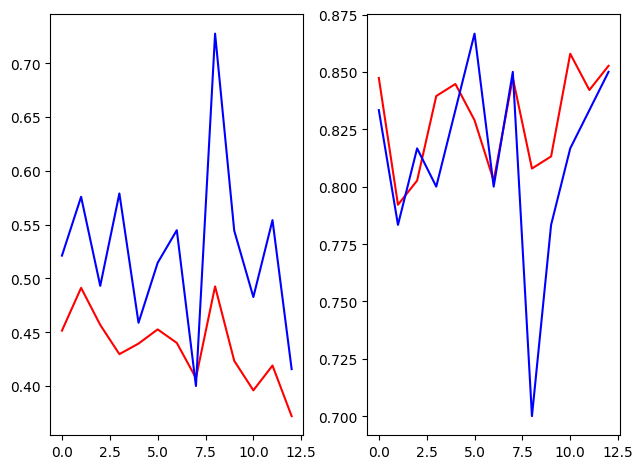

In [31]:
# 결과 그래프를 그려보아요!

import matplotlib.pyplot as plt
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(history.history['loss'], color='r')
ax1.plot(history.history['val_loss'], color='b')

ax2.plot(history.history['accuracy'], color='r')
ax2.plot(history.history['val_accuracy'], color='b')

plt.tight_layout()
plt.show()

## EarlyStopping 없이

In [32]:
# Model 학습 설정 및 진행

# model 학습 설정
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


# model checkpoint 확인
model_cp = ModelCheckpoint(filepath='infantface_checkpoint.ckpt',
                           save_weights_only=True,
                           save_best_only=True,
                           monitor='val_loss',
                           verbose=1)

# model earlystopping 확인(조기 종료는 언제할까요?)
model_es = EarlyStopping(monitor='val_loss',
                         patience=5,
                         verbose=1,
                         restore_best_weights=True)



history = model.fit(train_generator,
                    steps_per_epoch=76,
                    epochs=100,
                    verbose=1,
                    validation_data=validation_generator,
                    validation_steps=12,
                    callbacks=[model_cp])


model.save('./infantface_IDG_cnn_model.h5')

Epoch 1/100
76/76 [==============================] - ETA: 0s - loss: 0.4212 - accuracy: 0.8237
Epoch 1: val_loss improved from inf to 0.47716, saving model to infantface_checkpoint.ckpt
76/76 [==============================] - 10s 93ms/step - loss: 0.4212 - accuracy: 0.8237 - val_loss: 0.4772 - val_accuracy: 0.8833
Epoch 2/100
76/76 [==============================] - ETA: 0s - loss: 0.4822 - accuracy: 0.8158
Epoch 2: val_loss did not improve from 0.47716
76/76 [==============================] - 5s 66ms/step - loss: 0.4822 - accuracy: 0.8158 - val_loss: 0.4979 - val_accuracy: 0.8000
Epoch 3/100
76/76 [==============================] - ETA: 0s - loss: 0.4150 - accuracy: 0.8289
Epoch 3: val_loss did not improve from 0.47716
76/76 [==============================] - 7s 96ms/step - loss: 0.4150 - accuracy: 0.8289 - val_loss: 0.5098 - val_accuracy: 0.8667
Epoch 4/100
76/76 [==============================] - ETA: 0s - loss: 0.4230 - accuracy: 0.8316
Epoch 4: val_loss did not improve from 0.477

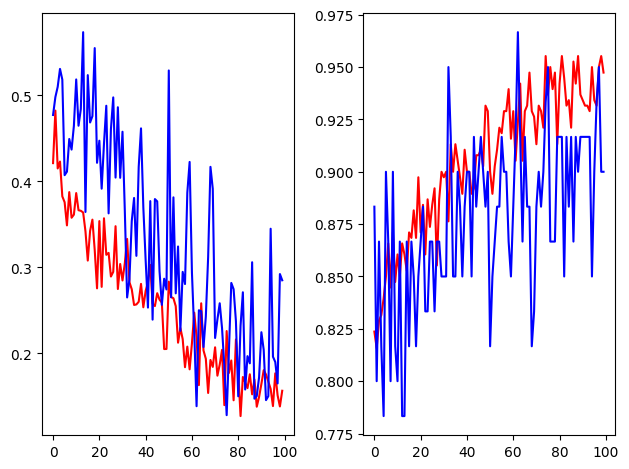

In [34]:
# 결과 그래프를 그려보아요!

import matplotlib.pyplot as plt
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(history.history['loss'], color='r')
ax1.plot(history.history['val_loss'], color='b')

ax2.plot(history.history['accuracy'], color='r')
ax2.plot(history.history['val_accuracy'], color='b')

plt.tight_layout()
plt.show()

- 학습 데이터가 부족할 때, 데이터의 양을 늘리기 위해 증식을 사용
- 이는 overfitting을 줄이는 것
- 이 모델 자체의 accuracy를 높이는 것은 아님

# 여기까지 모델로 Test 진행

In [35]:
# 테스트에 필요한 module import
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [46]:
# 저장된 모델 파일의 경로
saved_model_path = '/content/infantface_IDG_cnn_model.h5'

# 테스트할 이미지 경로 설정
test_image_path = '/content/drive/MyDrive/KOSA3/project/data/baby6.png'

# 모델 로드
loaded_model = load_model(saved_model_path)

# 이미지 불러오기 및 전처리
img = image.load_img(test_image_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

In [47]:
# 모델 예측
predictions = loaded_model.predict(img_array)

# 예측 결과 해석 및 출력
class_indices = np.argmax(predictions, axis=1)

# 각 클래스의 인덱스에 따른 레이블 설정 (positive, neutral, negative)
class_labels = ['positive', 'neutral', 'negative']
predicted_label = class_labels[class_indices[0]]

print(f"Predicted Class: {predicted_label}")

1/1 [==============================] - 0s 168ms/step
Predicted Class: positive
